In [8]:
import spacy
import nltk
from nltk.corpus import conll2002
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import warnings
warnings.filterwarnings("ignore")

In [9]:
test_sents = conll2002.tagged_sents('esp.testb')
nlp = spacy.load("es_core_news_md")

In [10]:
def map_conll_to_universal(tag):
    if tag.startswith("NC"):
        return "NOUN"
    elif tag.startswith("NP"):
        return "PROPN"
    elif tag.startswith("AQ") or tag.startswith("AO") or tag.startswith("QA"):
        return "ADJ"
    elif tag.startswith("DA") or tag.startswith("DD") or tag.startswith("DE") or tag.startswith("DI") or tag.startswith("DN") or tag.startswith("DP") or tag.startswith("DT"):
        return "DET"
    elif tag.startswith("P") and not tag.startswith("PT"):
        return "PRON"
    elif tag.startswith("PT"):
        return "PART"
    elif tag.startswith("R"):
        return "ADV"
    elif tag.startswith("S"):
        return "ADP"
    elif tag.startswith("CC"):
        return "CCONJ"
    elif tag.startswith("CS"):
        return "SCONJ"
    elif tag.startswith("V"):
        return "VERB"
    elif tag.startswith("F") or tag == "Z":
        return "PUNCT"
    elif tag == "I":
        return "INTJ"
    elif tag == "Y":
        return "SYM"
    elif tag in ["0", "W", "Z"]:
        return "NUM"
    else:
        return None

In [11]:
start_time = time.time()

gold_tags = []
gold_tags_mapped = []
pred_tags = []
words = []

for sent in test_sents:
    sentence_words = [word for word, _ in sent]
    sentence_text = " ".join(sentence_words)
    
    doc = nlp(sentence_text)
    
    for token, (_, true_tag) in zip(doc, sent):
        words.append(token.text)
        gold_tags.append(true_tag)
        gold_tags_mapped.append(map_conll_to_universal(true_tag))
        pred_tags.append(token.pos_)  # spaCy POS (universal)

end_time = time.time()
execution_time = end_time - start_time

In [12]:
# Φιλτράρουμε None
filtered = [(g, p) for g, p in zip(gold_tags_mapped, pred_tags) if p is not None]
filtered_gold, filtered_pred = zip(*filtered)

print(f"Accuracy: {accuracy_score(filtered_gold, filtered_pred):.4f}")
print(f"F1 Score: {f1_score(filtered_gold, filtered_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(filtered_gold, filtered_pred, average='weighted'):.4f}")
print(f"Execution Time: {execution_time:.2f} seconds")

print("\nClassification Report:")
print(classification_report(filtered_gold, filtered_pred))

Accuracy: 0.7822
F1 Score: 0.8357
Recall: 0.7822
Execution Time: 18.44 seconds

Classification Report:
              precision    recall  f1-score   support

         ADJ       0.85      0.61      0.71      4380
         ADP       0.95      0.94      0.95      8741
         ADV       0.91      0.91      0.91      1236
         AUX       0.00      0.00      0.00         0
       CCONJ       0.93      0.95      0.94      1198
         DET       0.94      0.89      0.92      7136
        INTJ       0.00      0.00      0.00        23
        NOUN       0.90      0.66      0.76     12347
         NUM       0.00      0.00      0.00         0
        PART       0.00      0.00      0.00        10
        PRON       0.84      0.79      0.82      2114
       PROPN       0.05      0.95      0.09       292
       PUNCT       0.95      0.81      0.88      7644
       SCONJ       0.77      0.86      0.81       960
         SYM       0.00      0.00      0.00         3
        VERB       0.95      0.6

In [13]:
errors = [(w, g, p) for w, g, p in zip(words, gold_tags_mapped, pred_tags) if p is not None and g != p]

print(f"Total Errors: {len(errors)}")
print("Sample Errors:")
for i in range(min(10, len(errors))):
    print(errors[i])

Total Errors: 11223
Sample Errors:
('Coruña', 'NOUN', 'PROPN')
('23', 'PUNCT', 'NUM')
('on', 'NOUN', 'ADJ')
('Internet', 'NOUN', 'PROPN')
('España', 'VERB', 'PROPN')
('300', 'PUNCT', 'NUM')
('ciento', 'PRON', 'NUM')
('al', 'ADP', 'DET')
('1999', 'PUNCT', 'NOUN')
('Iñigo', 'ADJ', 'PROPN')


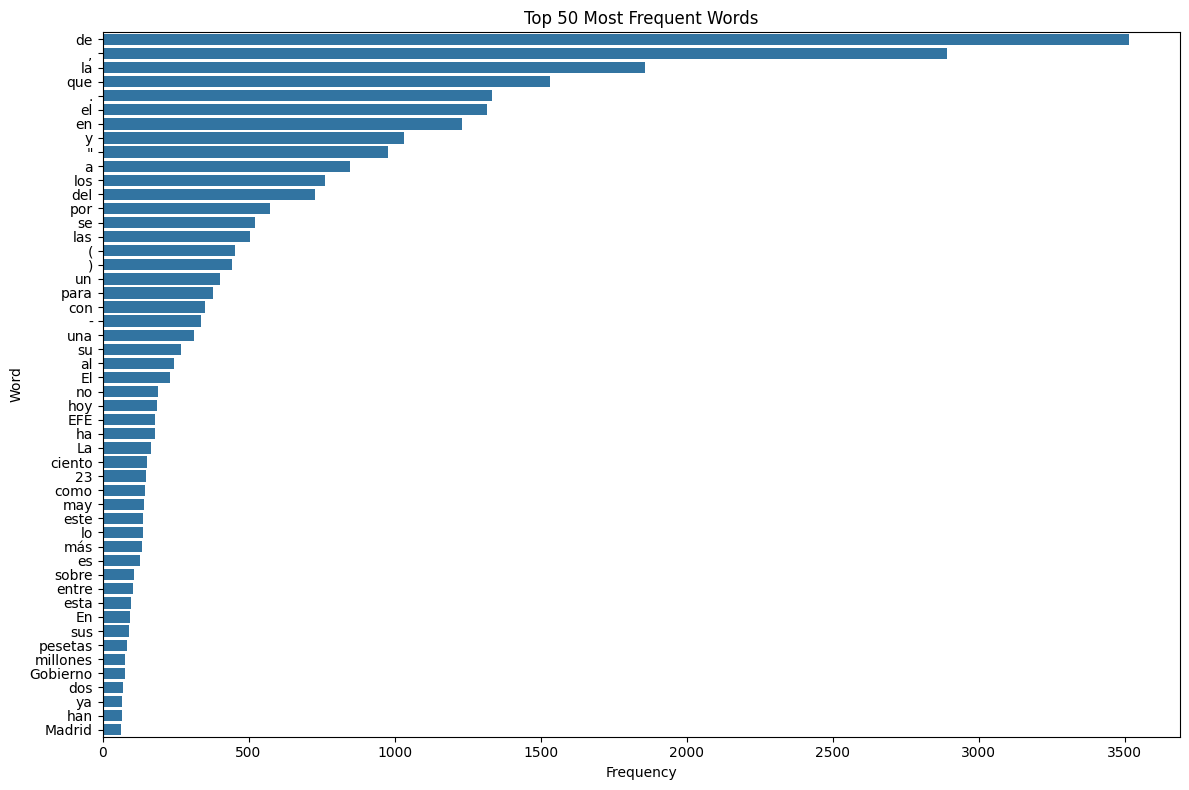

In [7]:
word_freq = Counter(words)
common_words = word_freq.most_common(50)

df_freq = pd.DataFrame(common_words, columns=["Word", "Frequency"])

plt.figure(figsize=(12, 8))
sns.barplot(data=df_freq, y="Word", x="Frequency")
plt.title("Top 50 Most Frequent Words")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.tight_layout()
plt.show()